# José Zehentner

# Sampling & Volumenanteile im Hyperwürfel

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dieses Notebook untersucht geometrische und statistische Eigenschaften des $d$-dimensionalen Einheitswürfels $H_d$. Es wird analysiert, wie groß ein innerer Würfel $M_d(p)$ sein muss, um einen bestimmten Volumenanteil zu enthalten, und wie viele Zufallsproben $n$ erforderlich sind, um mit einer gewünschten Wahrscheinlichkeit mindestens einen Punkt in diesem Bereich zu treffen.

Grundlage ist die Herleitung der Formel:

$$ n = \frac{1}{log_\frac{1}{2}(1-(2p_{\text{median}})^d)}$$

welche beschreibt, wie sich die benötigte Sample-Größe in Abhängigkeit von der Dimension $d$ und der Zielwahrscheinlichkeit verhält.

Volumina der Hypercubes:

$$ V(M_d(p)) = p^d $$
$$ V(H_d) = 1 $$

Wobei $p$ = Kantenlänge und $d$ = Dimension ist. <br>
Mit dem Ziel dass $V(M_d(p))$ einen bestimmten Anteil (1%, 10%, oder 25%) von $V(H_d)$ ausmachen soll, ergibt sich folgender Zusammenhang:

$ p^d = Anteil \cdot 1 \quad \Rightarrow \quad p = (Anteil)^\frac{1}{d}$


In [21]:
percentages = [0.01, 0.1, 0.25]
dimensions = [1, 5, 10]
table = {}
value_list = []

for dimension in dimensions:
    table[f"d={dimension}"] = [round(percentage**(1/dimension), 4) for percentage in percentages]

df = pd.DataFrame(table)
df.index = percentages

Man erhält folgende $p$-Werte für die jeweiligen Prozentanteile:

In [24]:
df

,d=1,d=5,d=10
0.01,0.01,0.3981,0.6310
0.10,0.10,0.6310,0.7943
0.25,0.25,0.7579,0.8706


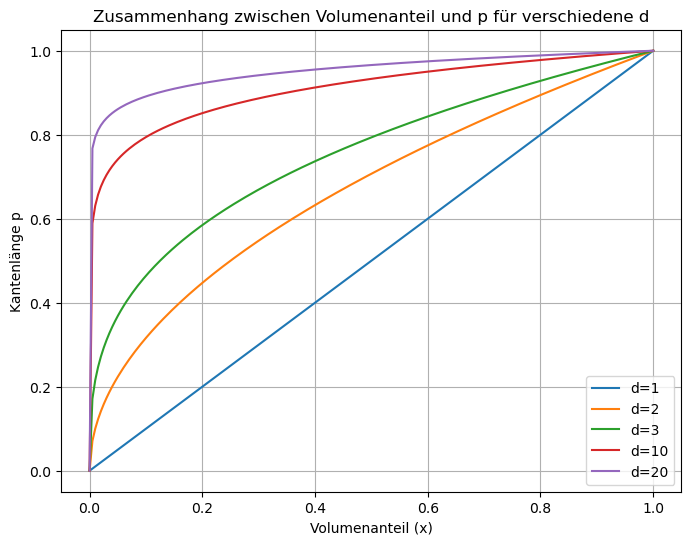

In [26]:
# Gewünschte Dimensionen
dimensions = [1, 2, 3, 10, 20]

# Volumenanteile (x-Werte) von 0 bis 1 mit feiner Auflösung
volume_fractions = np.linspace(0, 1, 200)

plt.figure(figsize=(8,6))

for d in dimensions:
    # Für jede Dimension p als Funktion des Volumenanteils berechnen: p = x^(1/d)
    p_values = volume_fractions**(1/d)
    plt.plot(volume_fractions, p_values, label=f"d={d}")

plt.title("Zusammenhang zwischen Volumenanteil und p für verschiedene d")
plt.xlabel("Volumenanteil (x)")
plt.ylabel("Kantenlänge p")
plt.legend()
plt.grid(True)
plt.show()

Wie oben angedeutet wächst die Kantenlänge sowohl bei höherem Volumenanteil als auch bei höheren Dimensionen. Hier wird nochmal deutlich, dass in hohen Dimensionen die Kantenlänge auch bei minimalem Volumenanteil extrem groß wird. Übertragen auf den Abstand von Punkten im d-dimensionalem Raum heißt das, dass die Datenpunkte im Hyperwürfel zunehmend in die äußeren Bereiche wandern, während sich im Zentrum des Würfels kaum Punkte befinden. Dies illustriert den Fluch der Dimensionalität, bei dem hochdimensionale Räume zunehmend ausdünnen und Abstände zwischen Punkten weniger aussagekräftig werden, was nicht-parametrischen Verfahren (wie KNN) das Finden der richtigen benachbarten Punkte erschwert.

## Beweis von: 
$$ n = \frac{1}{log_\frac{1}{2}(1-(2p_{\text{median}})^d)}$$


### Setup:

Wir haben $n$ unabhängige und gleichverteilte Datenpunkte $x_n$ im Einheitswürfel $H_d = [0,1]^d$. <br>
Der Mittelpunkt dieses Hypercubes ist $m = (0.5, ...,0.5)$.<br>

Unter Verwendung der Maximumsnorm $||v||_{\infty}$ ist der Abstand $p_{\text{min}}$ vom Punkt mit dem minimalen Abstand $x^*$ zu $m$ definiert durch: 
$$p_{\text{min}} = min||x_i - m||_{\infty}$$
(Die Maximumsnorm wählt für jeden Punkt $x_i$ die Koordinate $x_j$ aus, in der $|x_j - m|$ maximal ist, aus allen Maximalwerten soll nun der Minimalwert gewählt werden.)<br> 
Da wir uns im Einheitswürfel $H_d$ befinden, muss für jeden Punkt $x_i$ gelten: 
$$||x_i - m||_{\infty} \leq p$$
wobei $p \in[0,0.5]$ sein muss. Für $p > 0.5$ würde das Intervall $[0.5 - p,0.5 + p]^d$ die Grenzen von $H_d$ überschreiten.<br>
Der (Mini)-Hypercube in $H_d$ der alle Punkte $x_i$ "gerade so einschließt" hat somit die Kantenlänge $2p$. Sein Volumen ist folglich:
$$(2p)^d$$


### Wahrscheinlichkeiten für einen beliebigen einzelnen Punkt:

Für einen Punkt $x \in H_d$ ist die Wahrscheinlichkeit das dessen Abstand $||x-c||_{\infty} \leq p$ (Punkt liegt innerhalb der Grenzen von $p$), gleich dem Volumen des Miniwürfels:
$$ P(||x-c||_{\infty} \leq p)\quad \Rightarrow \quad \frac{V(M_d(p))}{V(H_d)}\quad \Rightarrow \quad \frac{(2p)^d}{1} \quad\Rightarrow \quad (2p)^d$$
Die Wahrscheinlichkeit des Gegenereignisses $||x-c||_{\infty} > p$ (Punkt liegt außerhalb der Grenzen von $p$) ist folglich:
$$1- (2p)^d$$

### Übertragen auf $n$ Datenpunkte:
Wahrscheinlichkeit, dass alle $n$ Punkte innerhalb der Grenzen von $p$ liegen:
$$[(2p)^d]^n$$
Wahrscheinlichkeit, dass kein $n$ Punkt innerhalb der Grenzen von $p$ liegt:
$$[1-(2p)^d]^n$$

### Übertragen auf $p_{\text{min}}$:

Wenn $p_{\text{min}} > p$ ist, liegen automatisch alle Punkte außerhalb der Grenzen von $p$, die Wahrscheinlichkeit ist somit ebenfalls:
$$[1-(2p)^d]^n$$
Gesucht ist das Gegenereignis "mindestens ein Punkt ($x^*$) liegt innerhalb der Grenzen von $p$." Wir erhalten die Verteilungsfunktion:
$$P(p_{\text{min}} \leq p) = 1-[1-(2p)^d]^n $$
Der Median ist der Punkt an dem die Verteilungsfunktion den Wert $0.5$ erreicht, somit:
$$P(p_{\text{min}} \leq p_{\text{median}}) = 0.5 \quad \Rightarrow \quad 1-[1-(2p_{\text{median}})^d]^n = 0.5 $$


### Auflösen nach $p_{\text{median}}$:

$$ 1-[1-(2p_{\text{median}})^d]^n =  \frac{1}{2}$$
$$ -[1-(2p_{\text{median}})^d]^n =  -\frac{1}{2}$$
$$ [1-(2p_{\text{median}})^d]^n =  \frac{1}{2}$$
$$ 1-(2p_{\text{median}})^d =  \sqrt[n]{\frac{1}{2}}$$
$$ -(2p_{\text{median}})^d =  \sqrt[n]{\frac{1}{2}} -1$$
$$ (2p_{\text{median}})^d =  1-\sqrt[n]{\frac{1}{2}}$$
$$ 2p_{\text{median}} =  \sqrt[d]{1-\sqrt[n]{\frac{1}{2}}}$$
$$ p_{\text{median}} =  \frac{1}{2}\sqrt[d]{1-\sqrt[n]{\frac{1}{2}}}$$

Um die Anzahl benötigter Datenpunkte $n$ bei konstantem Median für ein bestimmtes $d$ zu erhalten, stellen wir die Formel nach $n$ um:
$$ p_{\text{median}} = \frac{1}{2}\sqrt[d]{1-\sqrt[n]{\frac{1}{2}}}$$
$$2p_{\text{median}} = \sqrt[d]{1-\sqrt[n]{\frac{1}{2}}}$$
$$(2p_{\text{median}})^d = 1-\sqrt[n]{\frac{1}{2}}$$
$$(2p_{\text{median}})^d - 1 = -\sqrt[n]{\frac{1}{2}}$$
$$1-(2p_{\text{median}})^d = \sqrt[n]{\frac{1}{2}}$$
$$log_\frac{1}{2}(1-(2p_{\text{median}})^d) = \frac{1}{n}$$
$$ n = \frac{1}{log_\frac{1}{2}(1-(2p_{\text{median}})^d)}$$

Mit dieser Formel lassen sich nun die benötigten Datenpunkte berechnen.

C:\Users\Dell\AppData\Local\Temp\ipykernel_5292\3373387731.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return numerator / denominator


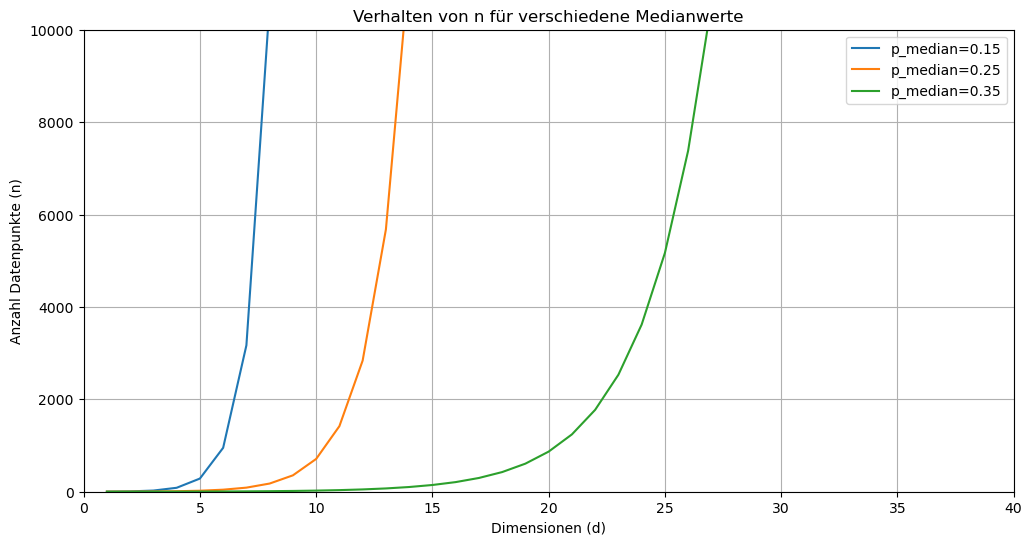

In [37]:
# Funktion zur Berechnung von n
def calculate_n(d, p_median):
    numerator = 1
    denominator = np.log(1 - (2 * p_median)**d) / np.log(0.5)
    return numerator / denominator

p_medians = [0.15, 0.25, 0.35] # Medianwerte
dimensions = np.arange(1, 41, 1)  # Dimensionen von 1 bis 40

# Plot
plt.figure(figsize=(12, 6))

for p_median in p_medians:
    n_values = [calculate_n(d, p_median) for d in dimensions]
    plt.plot(dimensions, n_values, label=f'p_median={p_median}', marker='')

plt.xlabel('Dimensionen (d)')
plt.ylabel('Anzahl Datenpunkte (n)')
plt.title('Verhalten von n für verschiedene Medianwerte')
plt.legend()
plt.grid()
plt.ylim(0, 10000)  
plt.xlim(0, 40) 
plt.show()

Je kleiner die Wahl des Medianwerts, desto früher (im Bezug auf d) sind sehr viele Datenpunkte notwenig um den Raum genügend auszufüllen, sodass dieser Medianwert auch erreicht wird.

# Experimenteller Nachweis der Formel:

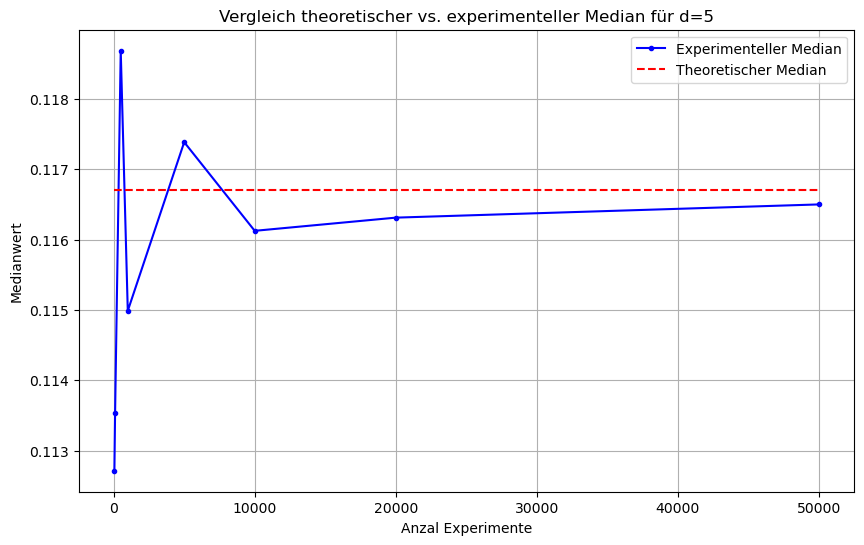

In [41]:
# Formel des Medians
def theoretical_median(dimension, datapoints):
    return 0.5 * (1 - 2**(-1 / datapoints))**(1 / dimension)

# Parameter
dimensions = [5]  # Dimension (Beispielhaft für d=5)
n = 1000  # Anzahl der Punkte
realization_steps = [50, 100, 500, 1000, 5000, 10000, 20000, 50000]  # Verschiedene Anzahlen von Realisierungen

results = []

for d in dimensions:
    for realizations in realization_steps:
        shortest_distances = []

        for _ in range(realizations):
            # Generiere zufällige Punkte im d-dimensionalen Hyperwürfel
            points = np.random.uniform(0, 1, size=(n, d))

            # Berechne Maximumsnorm (Abstand zu (0.5, ..., 0.5))
            distances = np.max(np.abs(points - 0.5), axis=1)

            # Speichere den kürzesten Abstand
            shortest_distances.append(np.min(distances))

        # Median der kürzesten Abstände
        experimental_median = np.median(shortest_distances)

        # Ergebnisse speichern
        results.append({
            'dimension': d,
            'realizations': realizations,
            'theoretical_median': theoretical_median(d, n),
            'experimental_median': experimental_median,
            'deviation': abs(theoretical_median(d, n) - experimental_median)
        })

# Konvertiere Ergebnisse in DataFrame
final_results = pd.DataFrame(results)

# Plot
plt.figure(figsize=(10, 6))

for d in dimensions:
    subset = final_results[final_results['dimension'] == d]
    
    # Plot der experimentellen Mediane
    plt.plot(subset['realizations'], subset['experimental_median'], color='blue', marker='.', label=f'Experimenteller Median')

    # Plot des theoretischen Medians
    theoretical_medians = [theoretical_median(d, n)] * len(subset['realizations'])
    plt.plot(subset['realizations'], theoretical_medians, color='red', linestyle='--', label=f'Theoretischer Median')

plt.xlabel('Anzal Experimente')
plt.ylabel('Medianwert')
plt.title('Vergleich theoretischer vs. experimenteller Median für d=5')
plt.legend()
plt.grid()
plt.show()

Der experimentelle Median schwankt bei wenigen Realisierungen stark um den theoretischen, je öfter das Experiment wiederholt wird desto näher schmiegt sich der experimentelle Median dem theoretischen an. Dies validiert und veranschaulicht die zuvor getroffenen theoretischen Überlegungen.